In [1]:
import tensorflow as tf
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:


# Comments for documentation:
# - `import tensorflow as tf`: Import TensorFlow for building and training machine learning models.
# - `import os`: Import os module to interact with the operating system, e.g., reading file paths.
# - `import pandas as pd`: Import pandas for data manipulation and analysis.
# - `import numpy as np`: Import NumPy for numerical operations on arrays and matrices.
# - `import matplotlib as plt`: Import matplotlib for creating static, interactive, and animated visualizations in Python.
# - `from sklearn.metrics import mean_squared_error as mse`: Import mean_squared_error from sklearn for calculating the MSE metric for model evaluation.
# - `from sklearn.preprocessing import MinMaxScaler`: Import MinMaxScaler from sklearn for feature scaling by normalizing or standardizing features.
# - `import warnings`: Import warnings module to suppress warnings.
# - `import matplotlib.pyplot as plt`: Import pyplot from matplotlib for plotting graphs.
# - `warnings.filterwarnings('ignore')`: Set up warnings to ignore them to avoid clutter in the output.
# - `%matplotlib inline`: Enable inline plotting for Jupyter notebooks, making plots appear in the notebook itself.


In [3]:
df = pd.read_csv('timeseries.csv')


In [4]:

# Load data into DataFrame
data = df.copy()

# Ensure 'time' column is of string type
data['time'] = data['time'].astype(str)

# Validate 'time' column format and filter rows with valid datetime-like strings
valid_time_format = r'^\d{8}:\d{4}$'
data = data[data['time'].str.match(valid_time_format, na=False)]

# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], format='%Y%m%d:%H%M')

# Set 'time' as the index
data.set_index('time', inplace=True)

# Convert all columns to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean of each column
data.fillna(data.mean(), inplace=True)

print(data.describe())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Create a new DataFrame with scaled data, preserving column names and index
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Display the first few rows and basic statistics to confirm
print(scaled_df.head())


data=scaled_df


               G(i)         H_sun           T2m         WS10m      Int
count  96432.000000  96432.000000  96432.000000  96432.000000  96432.0
mean     268.243379     19.959519     20.717446      1.853351      0.0
std      367.538766     25.768961      5.355001      0.946302      0.0
min        0.000000      0.000000      6.200000      0.000000      0.0
25%        0.000000      0.000000     16.590000      1.170000      0.0
50%        0.000000      0.000000     20.220000      1.790000      0.0
75%      548.090000     40.630000     24.940000      2.340000      0.0
max     1153.540000     86.320000     34.990000      6.070000      0.0
                         G(i)     H_sun       T2m     WS10m  Int
time                                                            
2010-01-01 00:07:00  0.000000  0.000000  0.172629  0.261944  0.0
2010-01-01 01:07:00  0.000000  0.000000  0.155262  0.261944  0.0
2010-01-01 02:07:00  0.000000  0.000000  0.135811  0.294893  0.0
2010-01-01 03:07:00  0.000000  0.000

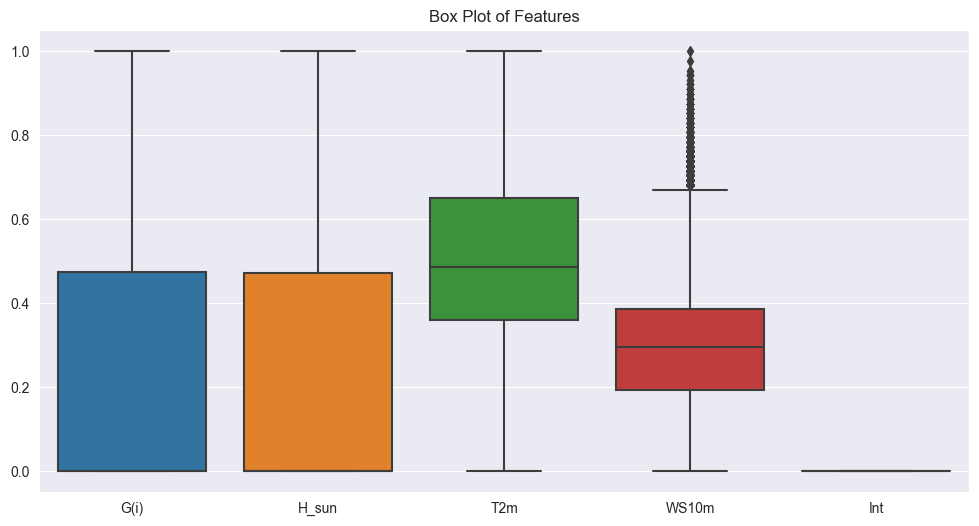

In [5]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Features')
plt.show()

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=96432, freq='H')
                         G(i)     H_sun       T2m     WS10m  Int
time                                                            
2019-01-01 00:00:00  0.000000  0.000000  0.259465  0.397035  0.0
2019-01-01 01:00:00  0.000000  0.000000  0.241751  0.397035  0.0
2019-01-01 02:00:00  0.000000  0.00

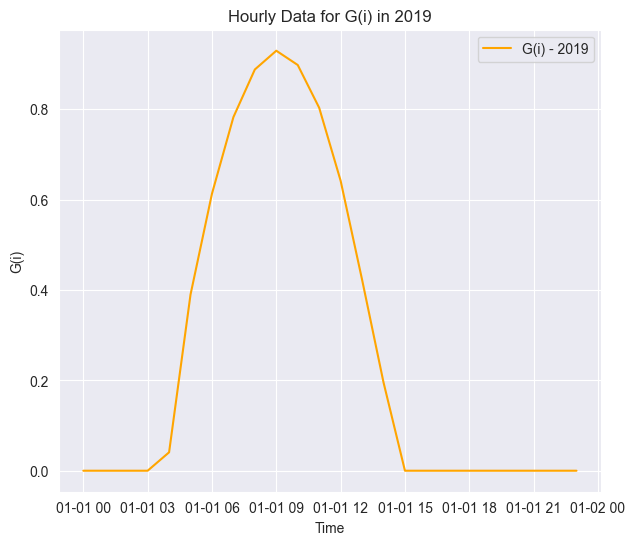

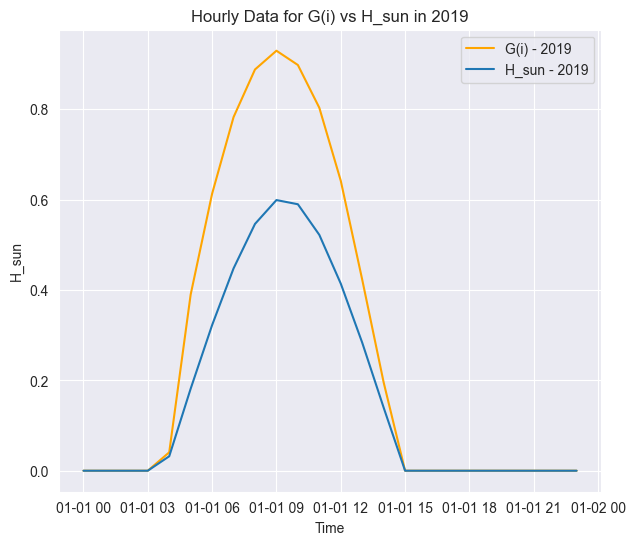

In [6]:

# this for hourly basis
# Now resample to hourly intervals
data_hourly = data.resample('H').mean()

# Verify index is DatetimeIndex
print(data_hourly.index)

# Continue with plotting code as before
# Get unique years in the dataset
#years = data_hourly.index.year.unique()



data_2019 = data_hourly[(data_hourly.index.year == 2019) & (data_hourly.index.month == 1) &
                        (data_hourly.index.day == 1)]
print(data_2019)

# this is plot for G (i) vesrus wiht h_sun
plt.figure(figsize=(7,6))
plt.plot(data_2019.index, data_2019['G(i)'], color='orange', label='G(i) - 2019')
plt.title('Hourly Data for G(i) in 2019')
plt.xlabel('Time')
plt.ylabel('G(i)')
plt.legend()
plt.show()
    
    
     

plt.figure(figsize=(7, 6))
plt.plot(data_2019.index, data_2019['G(i)'], color='orange', label='G(i) - 2019')
plt.plot(data_2019.index, data_2019['H_sun'], label='H_sun - 2019')
plt.title('Hourly Data for G(i) vs H_sun in 2019')
plt.xlabel('Time')
plt.ylabel('H_sun')
plt.legend()
plt.show()

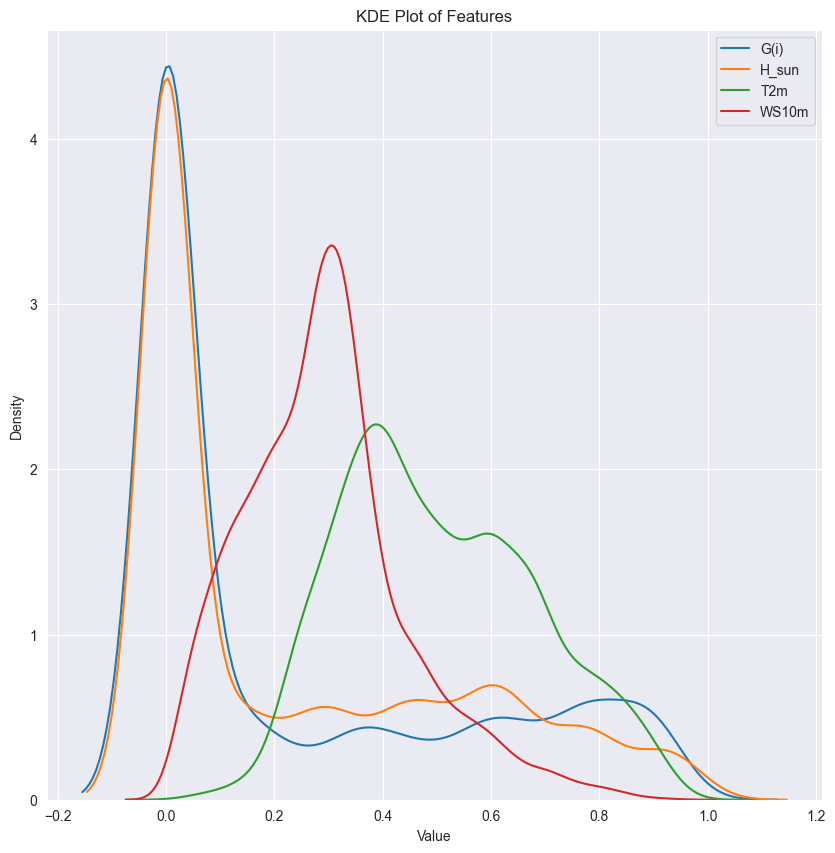

In [7]:
data_2019 = data_hourly[(data_hourly.index.year == 2019)]
# Additional KDE Plot for each feature to observe distribution
plt.figure(figsize=(10, 10))
for column in data_2019.columns:
    sns.kdeplot(data_2019[column] , label=column)
plt.title('KDE Plot of Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


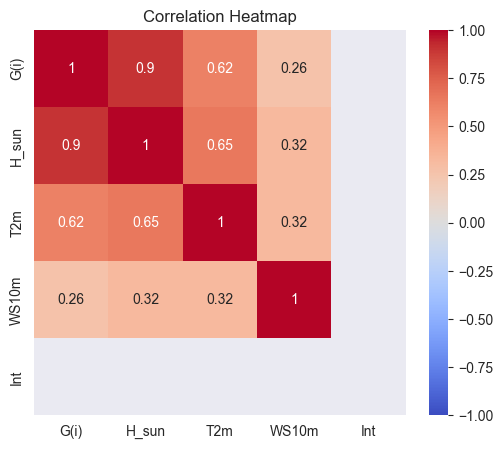

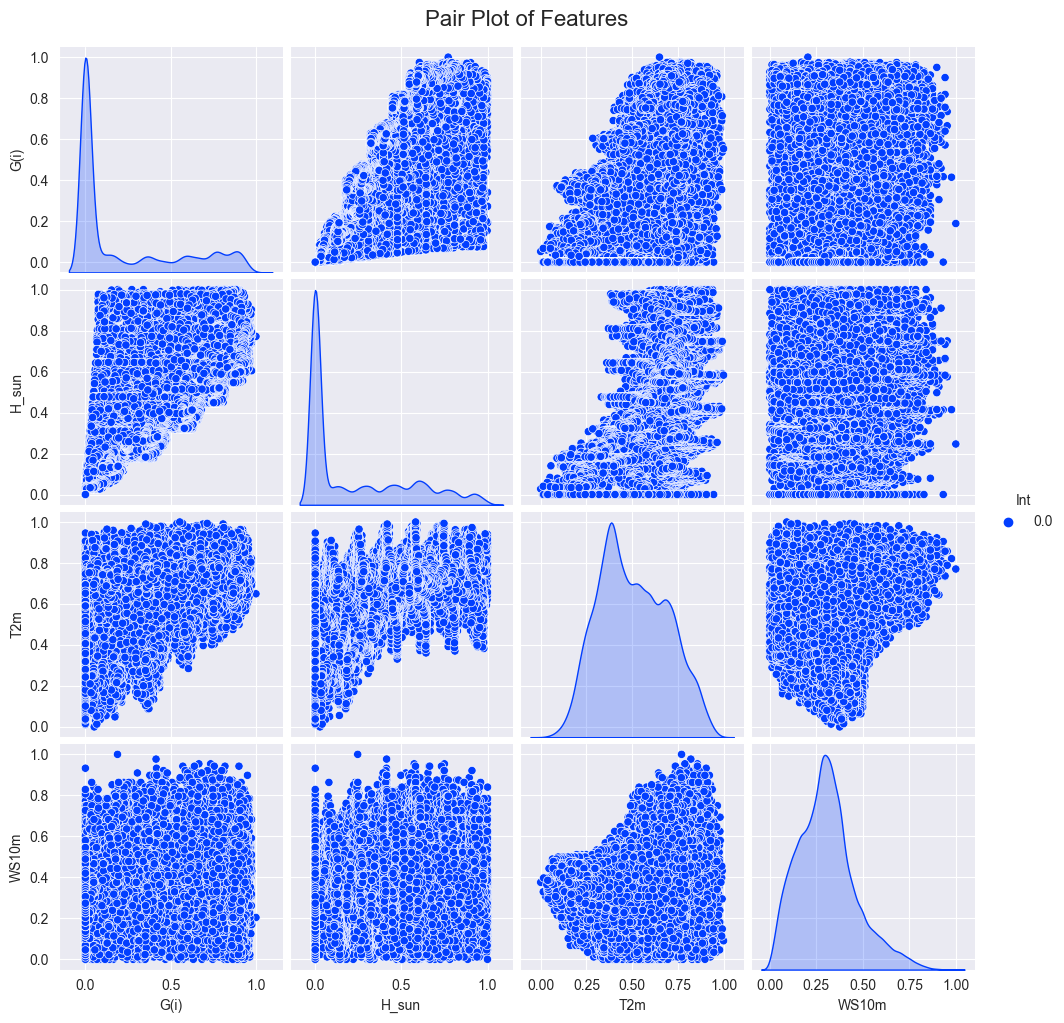

In [8]:
 ## Correlation Analysis
# Correlation Heatmap
plt.figure(figsize=(6, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot for Visualizing Relationships Between Features
sns.pairplot(data,hue='Int',palette='bright')
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.show()


In [9]:
df = df.dropna(subset=['time']) 
df['time'].tail(20)
# df['time'][78886]

96418                                        20201231:1007
96419                                        20201231:1107
96420                                        20201231:1207
96421                                        20201231:1307
96422                                        20201231:1407
96423                                        20201231:1507
96424                                        20201231:1607
96425                                        20201231:1707
96426                                        20201231:1807
96427                                        20201231:1907
96428                                        20201231:2007
96429                                        20201231:2107
96430                                        20201231:2207
96431                                        20201231:2307
96433    G(i): Global irradiance on the inclined plane ...
96434                           H_sun: Sun height (degree)
96435            T2m: 2-m air temperature (degree Celsiu

In [10]:
df = df[:96431:]  # Truncate the DataFrame to include only the first 96,431 rows.

df_multi = df.iloc[:,1:5]  # Select columns from index 1 to 4 (inclusive), typically removing the time column assuming it's at index 0.

df.tail(30)  # Display the last 30 rows of the DataFrame to check the end of the dataset.

print(df_multi.head(10))  # Print the first 10 rows of the subset DataFrame to verify the correct columns and data.

print(df_multi.dtypes)  # Print the data types of the columns in the subset DataFrame to ensure they are appropriate for further analysis.


      G(i)  H_sun    T2m  WS10m
0        0   0.00  11.17   1.59
1        0   0.00  10.67   1.59
2        0   0.00  10.11   1.79
3        0   0.00   9.88   1.86
4    91.98   2.76   9.77   1.93
5   432.28  15.67  11.48   1.72
6   681.34  27.82  15.42   1.72
7   867.69  38.65  19.13   1.72
8   987.62  47.15  21.08   1.66
9  1034.38  51.71  22.13   1.24
G(i)      object
H_sun    float64
T2m      float64
WS10m    float64
dtype: object


In [11]:
df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')
unique_types = df_multi['G(i)'].apply(type).unique()

print(unique_types)

[<class 'float'>]


In [12]:
df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')  
# Convert the 'G(i)' column to numeric types, coercing errors into NaN values to handle non-numeric data safely.

unique_types = df_multi['G(i)'].apply(type).unique()  
# Apply the 'type' function to each element in the 'G(i)' column and retrieve the unique data types present.

print(unique_types)  
# Print the array of unique data types found in the 'G(i)' column to inspect the types of data being processed.


[<class 'float'>]


In [13]:

df_scaled = df_multi.to_numpy()

correlation = df_multi['G(i)'].corr(df_multi['H_sun'])

print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.900361066319861


In [14]:

print(df_scaled[0:5,0]) # this it the input
print(df_scaled[5,0]) # this is the output

[ 0.    0.    0.    0.   91.98]
432.28


In [15]:
def df_to_X_y(df_as_np, window_size=5):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,0]]
    X.append(row)
    label = df_as_np[i+window_size,0]
    y.append(label)
  return np.array(X), np.array(y)

In [35]:



WINDOW_SIZE = 24 
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
print(X1[0])
print("#############################")
print(y1[0])
X1.shape, y1.shape

[   0.      0.      0.      0.     91.98  432.28  681.34  867.69  987.62
 1034.38  998.94  887.09  702.6   472.43  208.97    0.      0.      0.
    0.      0.      0.      0.      0.      0.  ]
#############################
0.0


((96407, 24), (96407,))

In [17]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 24), (61367,), (8760, 24), (8760,), (26279, 24), (26279,))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((24, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='min')

In [21]:
cp1 = ModelCheckpoint('model_G(I)/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [22]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp1,early_stopping])

Epoch 1/30
1917/1918 [============================>.] - ETA: 0s - loss: 102074.1562 - root_mean_squared_error: 319.4905

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 33s 16ms/step - loss: 102045.9453 - root_mean_squared_error: 319.4463 - val_loss: 17558.3066 - val_root_mean_squared_error: 132.5078
Epoch 2/30
1917/1918 [============================>.] - ETA: 0s - loss: 9050.7002 - root_mean_squared_error: 95.1352

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 29s 15ms/step - loss: 9053.0322 - root_mean_squared_error: 95.1474 - val_loss: 8260.1494 - val_root_mean_squared_error: 90.8854
Epoch 3/30
1917/1918 [============================>.] - ETA: 0s - loss: 6993.3486 - root_mean_squared_error: 83.6262

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 32s 16ms/step - loss: 6997.6768 - root_mean_squared_error: 83.6521 - val_loss: 7461.0068 - val_root_mean_squared_error: 86.3771
Epoch 4/30
1918/1918 [==============================] - 27s 14ms/step - loss: 6707.1489 - root_mean_squared_error: 81.8972 - val_loss: 7736.5132 - val_root_mean_squared_error: 87.9575
Epoch 5/30
1915/1918 [============================>.] - ETA: 0s - loss: 6736.7368 - root_mean_squared_error: 82.0776

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 30s 16ms/step - loss: 6738.2539 - root_mean_squared_error: 82.0869 - val_loss: 7385.4648 - val_root_mean_squared_error: 85.9387
Epoch 6/30
1918/1918 [==============================] - 22s 11ms/step - loss: 6526.3350 - root_mean_squared_error: 80.7857 - val_loss: 7693.9971 - val_root_mean_squared_error: 87.7154
Epoch 7/30
1918/1918 [==============================] - 24s 13ms/step - loss: 6526.0640 - root_mean_squared_error: 80.7841 - val_loss: 7720.0869 - val_root_mean_squared_error: 87.8640
Epoch 8/30
1918/1918 [==============================] - 21s 11ms/step - loss: 6558.1426 - root_mean_squared_error: 80.9824 - val_loss: 7413.9292 - val_root_mean_squared_error: 86.1042
Epoch 9/30
1918/1918 [==============================] - 23s 12ms/step - loss: 6543.5664 - root_mean_squared_error: 80.8923 - val_loss: 8146.7051 - val_root_mean_squared_error: 90.2591
Epoch 10/30
1918/1918 [==============================] - 22s 12ms/step - loss: 6448.2046 - 

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 25s 13ms/step - loss: 6389.2520 - root_mean_squared_error: 79.9328 - val_loss: 7294.3760 - val_root_mean_squared_error: 85.4071
Epoch 12/30
1918/1918 [==============================] - 19s 10ms/step - loss: 6435.5098 - root_mean_squared_error: 80.2216 - val_loss: 7327.6255 - val_root_mean_squared_error: 85.6015
Epoch 13/30
1918/1918 [==============================] - 19s 10ms/step - loss: 6441.9834 - root_mean_squared_error: 80.2620 - val_loss: 8852.6406 - val_root_mean_squared_error: 94.0885
Epoch 14/30
1918/1918 [==============================] - 21s 11ms/step - loss: 6311.7437 - root_mean_squared_error: 79.4465 - val_loss: 8612.0098 - val_root_mean_squared_error: 92.8009
Epoch 15/30
1918/1918 [==============================] - ETA: 0s - loss: 6347.9414 - root_mean_squared_error: 79.6740

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 21s 11ms/step - loss: 6347.9414 - root_mean_squared_error: 79.6740 - val_loss: 7266.3701 - val_root_mean_squared_error: 85.2430
Epoch 16/30
1918/1918 [==============================] - 16s 8ms/step - loss: 6397.1396 - root_mean_squared_error: 79.9821 - val_loss: 7416.5791 - val_root_mean_squared_error: 86.1196
Epoch 17/30
1918/1918 [==============================] - 18s 9ms/step - loss: 6283.1265 - root_mean_squared_error: 79.2662 - val_loss: 7352.9702 - val_root_mean_squared_error: 85.7495
Epoch 18/30
1918/1918 [==============================] - 21s 11ms/step - loss: 6269.1982 - root_mean_squared_error: 79.1783 - val_loss: 7389.3975 - val_root_mean_squared_error: 85.9616
Epoch 19/30
1916/1918 [============================>.] - ETA: 0s - loss: 6222.6143 - root_mean_squared_error: 78.8835

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 23s 12ms/step - loss: 6224.7642 - root_mean_squared_error: 78.8972 - val_loss: 7202.5898 - val_root_mean_squared_error: 84.8681
Epoch 20/30
1918/1918 [==============================] - 22s 11ms/step - loss: 6232.9399 - root_mean_squared_error: 78.9490 - val_loss: 7292.6201 - val_root_mean_squared_error: 85.3968
Epoch 21/30
1918/1918 [==============================] - 20s 11ms/step - loss: 6222.7021 - root_mean_squared_error: 78.8841 - val_loss: 7388.7095 - val_root_mean_squared_error: 85.9576
Epoch 22/30
1918/1918 [==============================] - 20s 10ms/step - loss: 6205.2705 - root_mean_squared_error: 78.7735 - val_loss: 7434.9033 - val_root_mean_squared_error: 86.2259
Epoch 23/30
1918/1918 [==============================] - 19s 10ms/step - loss: 6157.1089 - root_mean_squared_error: 78.4672 - val_loss: 7259.8457 - val_root_mean_squared_error: 85.2047
Epoch 24/30
1918/1918 [==============================] - 20s 10ms/step - loss: 6220.019

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 49s 26ms/step - loss: 6147.4253 - root_mean_squared_error: 78.4055 - val_loss: 7157.2378 - val_root_mean_squared_error: 84.6005
Epoch 29/30
1917/1918 [============================>.] - ETA: 0s - loss: 6108.6851 - root_mean_squared_error: 78.1581

INFO:tensorflow:Assets written to: model_G(I)\assets


INFO:tensorflow:Assets written to: model_G(I)\assets


1918/1918 [==============================] - 26s 13ms/step - loss: 6106.7217 - root_mean_squared_error: 78.1455 - val_loss: 7147.3794 - val_root_mean_squared_error: 84.5422
Epoch 30/30
1918/1918 [==============================] - 21s 11ms/step - loss: 6094.4429 - root_mean_squared_error: 78.0669 - val_loss: 7299.6094 - val_root_mean_squared_error: 85.4378


In [23]:
from tensorflow.keras.models import load_model
model1 = load_model('model_G(I)/')

In [24]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head(30)

1918/1918 [==============================] - 9s 4ms/step


,Train Predictions,Actuals
0,-0.258704,0.00
1,-0.120806,0.00
2,-0.191004,0.00
3,-0.177478,0.00
4,74.576775,17.78
5,328.346130,443.28
6,676.740417,642.75
7,823.330627,860.81
8,1024.778076,973.48
9,1026.826294,987.11


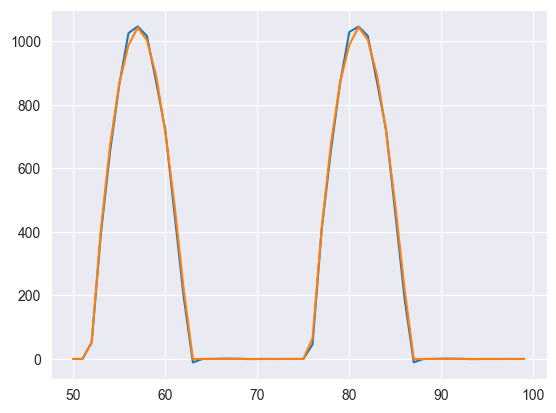

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [26]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results.head(20)

274/274 [==============================] - 1s 5ms/step


,Val Predictions,Actuals
0,-0.192020,0.00
1,-0.288108,0.00
2,-0.133625,0.00
3,-0.222941,0.00
4,-0.244606,0.00
5,92.432152,87.44
6,412.229584,429.21
7,676.162720,701.00
8,892.371582,896.93
9,1042.321289,1032.36


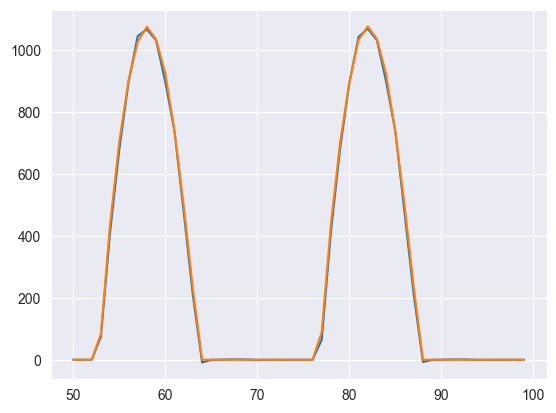

In [27]:
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [28]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

822/822 [==============================] - 4s 5ms/step


,Test Predictions,Actuals
0,-0.228857,0.00
1,-0.036344,0.00
2,-0.154960,0.00
3,-0.045226,0.00
4,32.554825,26.93
...,...,...
26274,0.779600,0.00
26275,0.918206,0.00
26276,0.488323,0.00
26277,-0.446130,0.00


In [29]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=50, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

822/822 [==============================] - 3s 4ms/step


(       Predictions  Actuals
 0        -0.228857     0.00
 1        -0.036344     0.00
 2        -0.154960     0.00
 3        -0.045226     0.00
 4        32.554825    26.93
 ...            ...      ...
 26274     0.779600     0.00
 26275     0.918206     0.00
 26276     0.488323     0.00
 26277    -0.446130     0.00
 26278    -0.309030     0.00
 
 [26279 rows x 2 columns],
 5420.1382738918055)

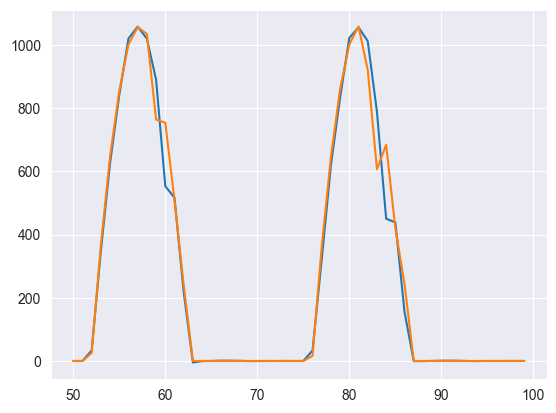

In [30]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [31]:
kkk = df_scaled[78866:78890,0]
print(type(kkk))
print(kkk.shape)
reshaped_array = np.reshape(kkk, (1, 24, 1))
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions)
 
# original= scaler.inverse_transform(predictions)
# print(original)
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

<class 'numpy.ndarray'>
(24,)
[[[   0.  ]
  [   0.  ]
  [  32.27]
  [ 390.79]
  [ 662.61]
  [ 859.19]
  [ 984.91]
  [1037.92]
  [1002.38]
  [ 894.79]
  [ 712.07]
  [ 467.98]
  [ 205.25]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]
  [   0.  ]]]
1/1 [==============================] - 1s 1s/step
[[-0.1367259]]


In [32]:

input = df_scaled[78866:78890,0]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  
output_not_scaled = [] 

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 24, 1))
    prediction = model1.predict(reshaped_array)
    
    # Reshape the prediction to match the input shape if necessary
    # Adjust the reshaping based on the actual shape of your model's output
    prediction_reshaped = np.reshape(prediction, (1, 1))
    input = np.reshape(input, (24, 1))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 24 entries, including the newly added prediction
 
    output_scaled.append(prediction)


# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




1/1 [==============================] - 0s 31ms/step
[array([[-0.1367259]], dtype=float32), array([[-0.03662395]], dtype=float32), array([[38.459137]], dtype=float32), array([[375.21887]], dtype=float32), array([[644.4181]], dtype=float32), array([[839.527]], dtype=float32), array([[995.37897]], dtype=float32), array([[1046.3849]], dtype=float32), array([[1000.23737]], dtype=float32), array([[855.2567]], dtype=float32), array([[675.44666]], dtype=float32), array([[426.87762]], dtype=float32), array([[153.90446]], dtype=float32), array([[-13.48477]], dtype=float32), array([[1.1827693]], dtype=float32), array([[-0.01813793]], dtype=float32), array([[0.70080817]], dtype=float32), array([[1.237166]], dtype=float32), array([[1.4116181]], dtype=float32), array([[1.2830467]], dtype=float32), array([[0.9227991]], dtype=float32), array([[0.72024286]], dtype=float32), array([[1.0366094]], dtype=float32), array([[1.477968]], dtype=float32)]


In [33]:
print("this is the real scaled output")
for i in output_scaled:
    print(i[0][0])

this is the real scaled output
-0.1367259
-0.036623955
38.459137
375.21887
644.4181
839.527
995.37897
1046.3849
1000.23737
855.2567
675.44666
426.87762
153.90446
-13.48477
1.1827693
-0.018137932
0.70080817
1.237166
1.4116181
1.2830467
0.9227991
0.72024286
1.0366094
1.477968
